In [1]:
import tempfile
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from qiime2 import Artifact
from qiime2.plugins.feature_classifier.methods import classify_consensus_vsearch
from qiime2.plugins.feature_table.methods import relative_frequency
from qiime2.plugins.quality_control.visualizers import evaluate_taxonomy

%matplotlib inline

In [2]:
working_dir = '/mnt/c/Users/Dylan/Documents/zaneveld/GCMP_Global_Disease-master/analysis/organelle_removal'
mocks = ['12', '13', '14', '15', '16', '18', '19', '20', '21', '22']
base_references = ['greengenes', 'silva']
threads = 24

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --usearch_global /tmp/qiime2-archive-p4alqu6l/56f99adf-238a-45b9-bf99-6185e4b56c66/data/dna-sequences.fasta --id 0.8 --query_cov 0.8 --strand both --maxaccepts 10 --maxrejects 0 --db /tmp/qiime2-archive-0wumcm8e/06e4eff3-98c7-4e22-af11-51fbfd3493a5/data/dna-sequences.fasta --threads 24 --output_no_hits --blast6out /tmp/tmpt9dwwtyp

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --usearch_global /tmp/qiime2-archive-p4alqu6l/56f99adf-238a-45b9-bf99-6185e4b56c66/data/dna-sequences.fasta --id 0.8 --query_cov 0.8 --strand both --maxaccepts 10 --maxrejects 0 --db /tm

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --usearch_global /tmp/qiime2-archive-orl65lkz/30e357d1-ee5d-41f2-ab7a-b98f0018a3c3/data/dna-sequences.fasta --id 0.8 --query_cov 0.8 --strand both --maxaccepts 10 --maxrejects 0 --db /tmp/qiime2-archive-f5hz_8an/4a93ff96-30cd-42d9-85f1-1846d10d1633/data/dna-sequences.fasta --threads 24 --output_no_hits --blast6out /tmp/tmpcv50eciv

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --usearch_global /tmp/qiime2-archive-vq49bs83/1938089b-788e-40ad-a012-4a40c371c720/data/dna-sequences.fasta --id 0.8 --query_cov 0.8 --strand both --maxaccepts 10 --maxrejects 0 --db /tm

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --usearch_global /tmp/qiime2-archive-otraumas/db82cd99-6bb0-4cc1-b571-3d70f3222f24/data/dna-sequences.fasta --id 0.8 --query_cov 0.8 --strand both --maxaccepts 10 --maxrejects 0 --db /tmp/qiime2-archive-tip75b_m/d4169954-89dd-402a-bccb-af1bf96b9731/data/dna-sequences.fasta --threads 24 --output_no_hits --blast6out /tmp/tmp1wnyhnq5

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --usearch_global /tmp/qiime2-archive-otraumas/db82cd99-6bb0-4cc1-b571-3d70f3222f24/data/dna-sequences.fasta --id 0.8 --query_cov 0.8 --strand both --maxaccepts 10 --maxrejects 0 --db /tm

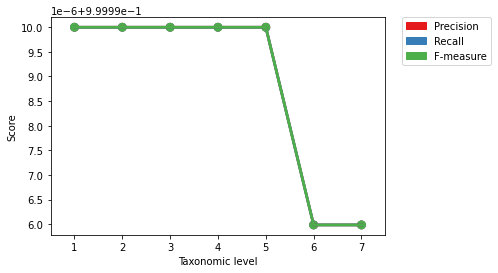

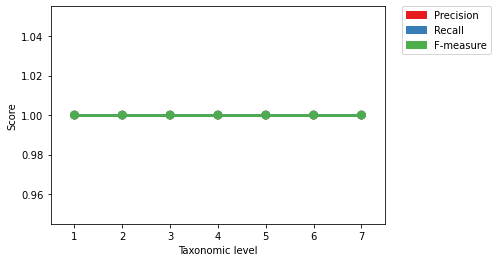

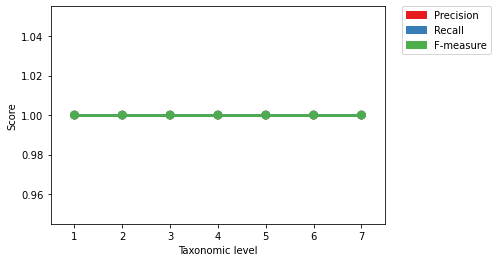

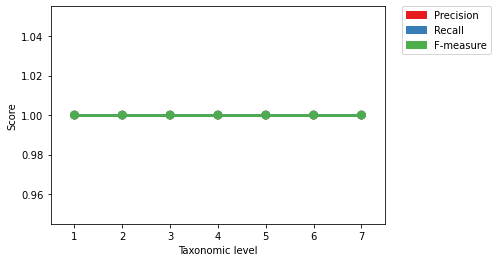

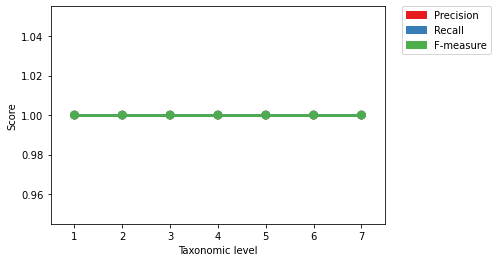

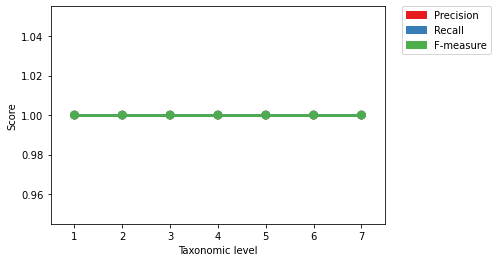

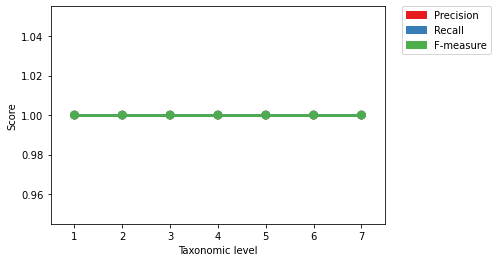

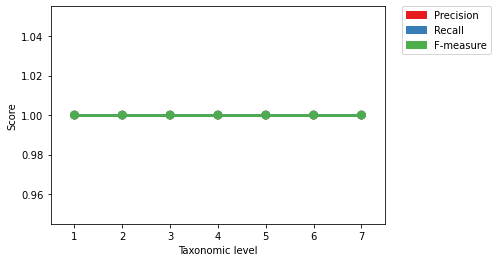

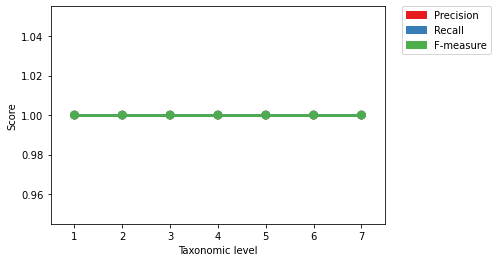

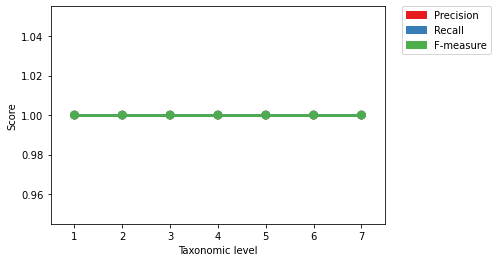

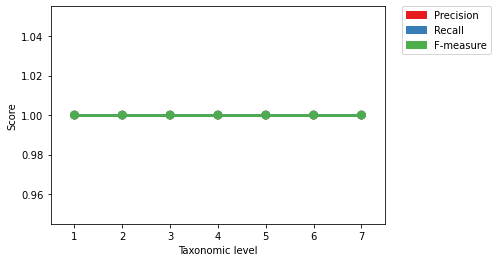

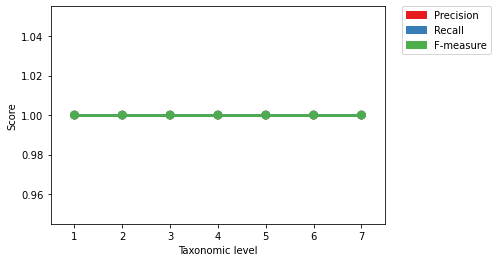

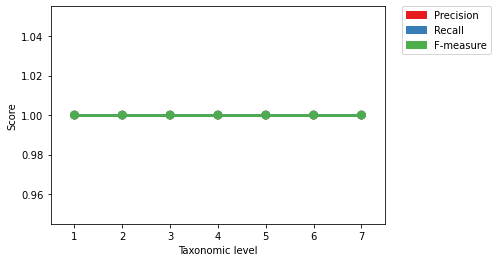

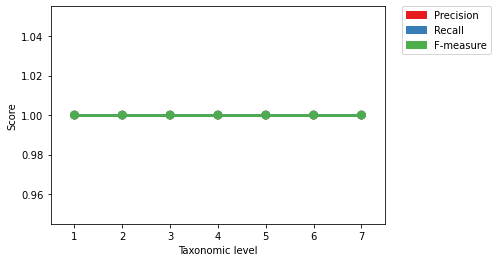

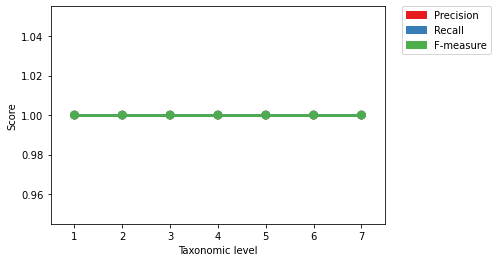

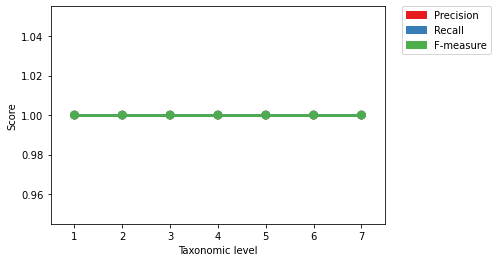

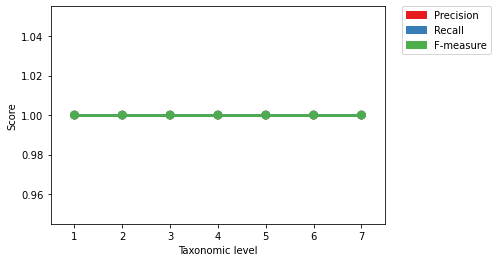

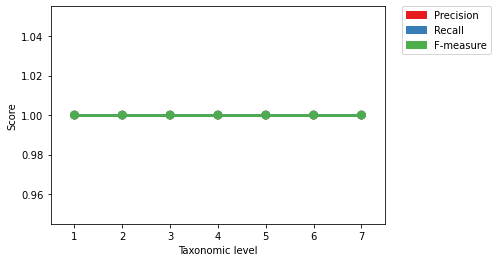

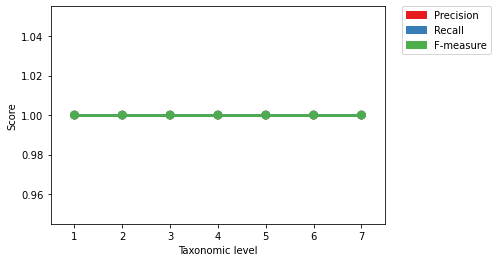

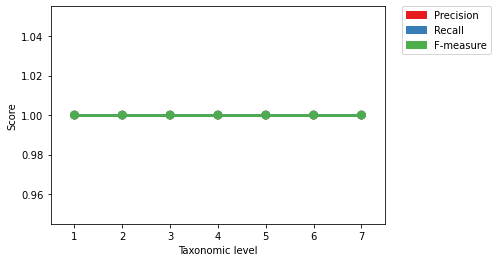

In [3]:
results = pd.DataFrame(columns = ['level', 'Precision', 'Recall', 'F-measure',
                                  'reference_comparison', 'mock'])
for mock in mocks:
    seqs_path = (working_dir + '/mock-community/mock-' + mock + '/rep_seqs.qza')
    ft_path = (working_dir + '/mock-community/mock-' + mock + '/feature_table.qza')
    seq_artifact = Artifact.load(seqs_path)
    ft = Artifact.load(ft_path)
    relative_ft, = relative_frequency(ft)
    for base_reference in base_references:
        base_read_path = (working_dir + '/output/taxonomy_references/' +
                          base_reference + '_otus.qza')
        base_taxonomy_path = (working_dir + '/output/taxonomy_references/' +
                              base_reference + '_taxonomy.qza')
        base_reads = Artifact.load(base_read_path)
        base_taxonomy = Artifact.load(base_taxonomy_path)
        base_classification_taxonomy, = classify_consensus_vsearch(seq_artifact,
                                                                   base_reads,
                                                                   base_taxonomy,
                                                                   threads = threads)
        extended_read_path = (working_dir + '/output/taxonomy_references/' +
                              base_reference + '_metaxa2_otus.qza')
        extended_taxonomy_path = (working_dir + '/output/taxonomy_references/' +
                                  base_reference + '_metaxa2_taxonomy.qza')
        extended_reads = Artifact.load(extended_read_path)
        extended_taxonomy = Artifact.load(extended_taxonomy_path)
        extended_classification_taxonomy, = classify_consensus_vsearch(seq_artifact,
                                                                       extended_reads,
                                                                       extended_taxonomy,
                                                                       threads = threads)
        accuracy_comparison, = evaluate_taxonomy(base_classification_taxonomy,
                                                 extended_classification_taxonomy,
                                                 7, feature_table = relative_ft)
        with tempfile.TemporaryDirectory() as tmpdir:
            accuracy_comparison.export_data(tmpdir)
            df = pd.read_csv(tmpdir + '/results.tsv', '\t', index_col = 0)
        df['reference_comparison'] = base_reference
        df['mock'] = mock
        results = pd.concat([results, df], ignore_index = True)
results.to_csv(working_dir + '/output/accuracy_metrics.csv')

In [4]:
results['mock (base)'] = results['mock'] + ' (' + results['reference_comparison'] + ')'
results['F-measure (relative to base)'] = results['F-measure']

,level,Precision,Recall,F-measure,reference_comparison,mock,mock (base),F-measure (relative to base)
0,1,1.0,1.0,1.0,greengenes,12,12 (greengenes),1.0
1,2,1.0,1.0,1.0,greengenes,12,12 (greengenes),1.0
2,3,1.0,1.0,1.0,greengenes,12,12 (greengenes),1.0
3,4,1.0,1.0,1.0,greengenes,12,12 (greengenes),1.0
4,5,1.0,1.0,1.0,greengenes,12,12 (greengenes),1.0
...,...,...,...,...,...,...,...,...
135,3,1.0,1.0,1.0,silva,22,22 (silva),1.0
136,4,1.0,1.0,1.0,silva,22,22 (silva),1.0
137,5,1.0,1.0,1.0,silva,22,22 (silva),1.0
138,6,1.0,1.0,1.0,silva,22,22 (silva),1.0


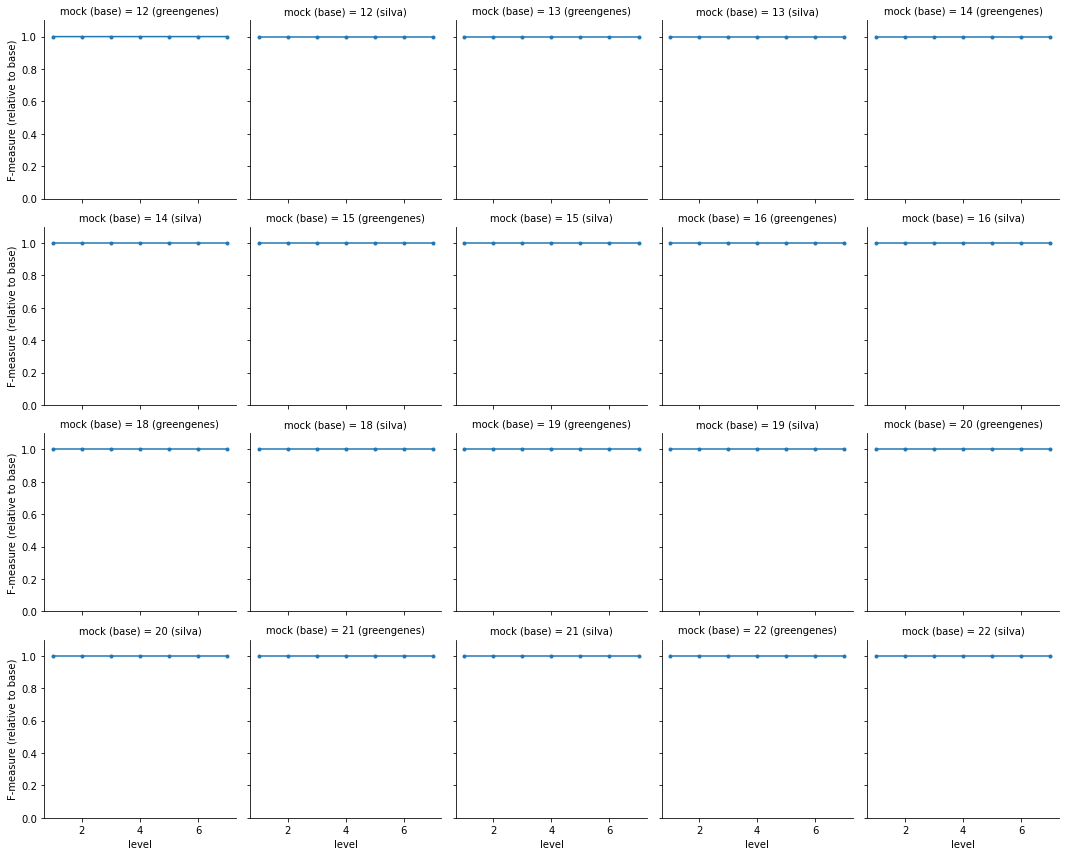

In [12]:
grid = sns.FacetGrid(results, col='mock (base)', col_wrap = 5)
grid.map(plt.plot, 'level', 'F-measure (relative to base)', marker = '.').add_legend()
grid.set(ylim = (0, 1.1))
plt.show()
grid.savefig(working_dir + '/output/accuracy_plots.png')